# Uso de los números aleatorios

## 1. Introducción al Módulo random

El módulo random de la librería estándar de Python incluye un conjunto de funciones que permiten obtener de distintos modos 
números pseudoaleatorios a través del algoritmo [Mersenne Twister](https://es.wikipedia.org/wiki/Mersenne_twister).

In [ ]:
#importamos el módulo que vamos a usar 

import random   

Las funciones de los módulos se invocan con el formato: módulo.función().

En el módulo random existe la función random, que devuelve un número aleatorio que sigue una distribución uniforme. 

Así, para obtener $x \sim U(0,1)$:

In [ ]:
x = random.random()  #Cada ejecución dará un número distinto.
print(x)

0.22459042903181037


Se puede usar algún bucle si se desea generar una secuencia $x_i \sim U(0,1)$ con $i = 1, 2, 3,..., N$:

In [ ]:
for i in range(10):
    print('%05.4f' % random.random(), end=' ')  #El código en rojo indica la cantidad de dígitos y de decimales a mostrar.
print()

0.1730 0.4887 0.3030 0.1287 0.9041 0.4496 0.6481 0.3635 0.0768 0.3892 


In [ ]:
for i in range(10):
    print('%05.4f' % random.random(), sep="\t")
print()

0.2543
0.1896
0.2995
0.5657
0.0052
0.5737
0.3345
0.8163
0.9974
0.3651



La función seed() fija el valor de la semilla en la generación de la secuencia de números aleatorios. 
Esto es útil cuando se quieren utilizar los mismos datos de entrada en una simulación.

In [ ]:
random.seed(1) #primero fijamos la semilla

for i in range(20):
    print('%05.4f' % random.random(), end=' ')
print()

0.1344 0.8474 0.7638 0.2551 0.4954 0.4495 0.6516 0.7887 0.0939 0.0283 0.8358 0.4328 0.7623 0.0021 0.4454 0.7215 0.2288 0.9453 0.9014 0.0306 


## Ejercicio 1: 
    a)Usar la función random() para simular 1 volado.
    b)Usar la función random() para simular 1000 volados.
    c)Determinar de b) la probabilidad de que ocurra "sol" en un volado. 

La función uniform() devuelve un número float incluido entre los valores indicados.

In [ ]:
for i in range(10):
    print('%5.4f' %random.uniform(1, 50), end=' ')
print()

2.2468 27.5292 47.0183 19.6790 11.6134 21.6837 2.4230 11.8629 22.4565 25.2948 


La función randint() devuelve un número entero incluido entre los valores indicados. 
Los valores de los límites inferior y superior también pueden aparecer entre los valores devueltos.

In [ ]:
for i in range(20):
    print(random.randint(-100, 100), end=' ')
print()

-41 -12 -41 73 -44 94 17 -26 -95 6 42 64 -75 -53 61 85 -25 -70 90 -15 


## Ejercicio 2:
    a) Simular un sorteo de los colores blanco, negro, rojo, azul y verde.
    b) Simular 5 sorteos con sustitución.

La función randrange() devuelve enteros que van desde un valor inicial a otro final 
separados entre sí un número de valores determinados.

In [ ]:
for i in range(20):
    print(random.randrange(0, 20, 3), end=' ')
print()

15 15 12 9 12 18 15 3 6 6 12 9 18 12 9 12 18 0 9 3 


# 2. Estimación del número $\pi$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

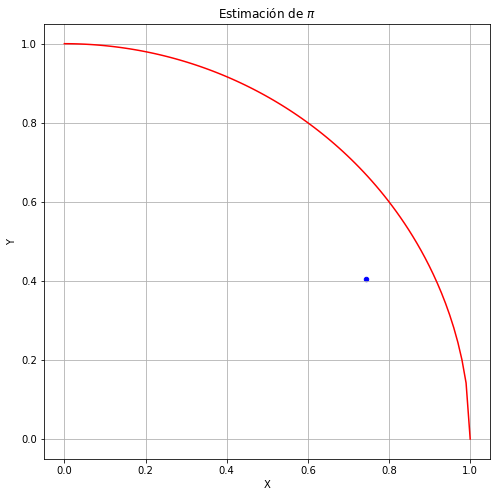

In [ ]:
x = np.linspace(0, 1, 100)
y = np.sqrt(1 - x**2)               # Ecuación del círculo en el primer cuadrante 


x_1 = random.random()
y_1 = random.random()

fig = plt.figure(1, figsize=(8, 8))        # Aquí fijamos el formato de la gráfica para que sea cuadrada.
plt.plot(x, y, color="red", markersize=1) 
plt.scatter(x_1, y_1, s=20, c="blue")
plt.title("Estimación de $\pi$")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

# Tarea 1. 
    Estimar el valor de pi usando la función random

## La aproximación analítica

Partamos de la ecuación:

##     $\pi = 4\arctan 1$

y usemos la aproximación de Taylor para expandir en una serie de potencias.

Recordar:

$f(x) = f(0) + f´(x)x + \frac{1}{2}f´´(0)x^2 + ...$

$Si f(x) = \arctan x$ entonces:

$f´(x) = \frac{d \arctan x}{dx} = \frac{1}{1 + x^2} \rightarrow f´(0) = 1$

$f´´(x) = \frac{d^2 \arctan x}{d^2x} = - \frac{2x}{(1 + x^2)^2} \rightarrow f´´(0) = 0$

...

$f^{2i + 1}(x) = (-1)^{i} \frac{(2i)!}{(1 + x^2)^{2i + 1}} \rightarrow f^{2i + 1}(0) = (-1)(2i)!$

$f^{2i}(x) = 0$

Entonces:

$\arctan x = \sum_{i = 0} (-1)^{i} \frac{x^{2i + 1}}{2i + 1}$

Por tanto:

## $\pi = \sum_{i = 0} (-1)^{i} \frac{4}{2i + 1}$

In [ ]:
def pi_taylor(n):
    pi = 0
    for i in range(n):
        pi = pi + 4.0/(2*i+1)*(-1)**i
        print(i, pi)

In [ ]:
pi_taylor(10)

0 4.0
1 2.666666666666667
2 3.466666666666667
3 2.8952380952380956
4 3.3396825396825403
5 2.9760461760461765
6 3.2837384837384844
7 3.017071817071818
8 3.2523659347188767
9 3.0418396189294032


In [ ]:
def pi_Taylor(n):
    pi = 0
    L =[]
    for i in range(n):
        pi = pi + 4.0/(2*i+1)*(-1)**i
        L.append(pi)
    fig = plt.figure(1, figsize=(8, 8))        
    plt.plot(L, color="red", markersize=1)
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación")
    plt.grid()
    plt.show()

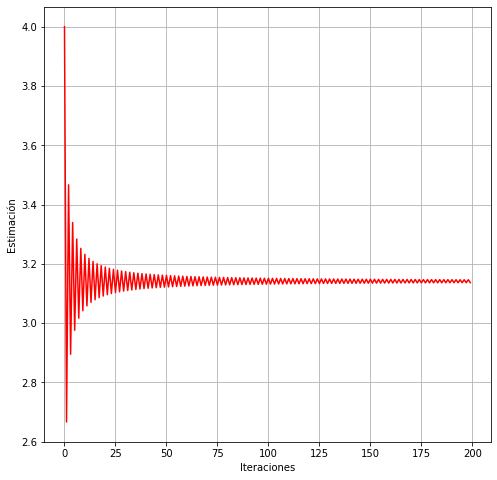

In [ ]:
pi_Taylor(200)

## Ejercicio 3:

Graficar las salidas obtenidas en la Tarea 1

## Continuamos

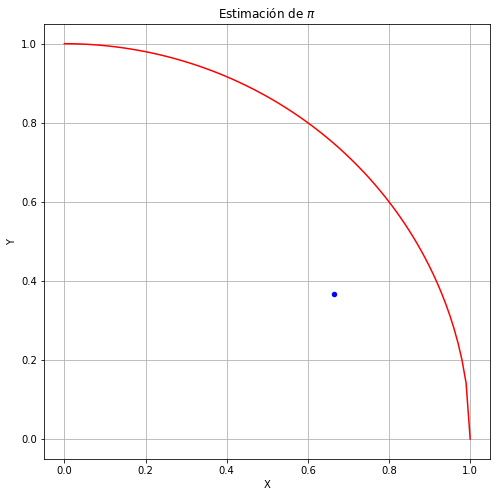

In [ ]:
x = np.linspace(0, 1, 100)
y = np.sqrt(1 - x**2)               # Ecuación del círculo en el primer cuadrante 


x_1 = random.random()
y_1 = random.random()

fig = plt.figure(1, figsize=(8, 8))        # Aquí fijamos el formato de la gráfica para que sea cuadrada.
plt.plot(x, y, color="red", markersize=1) 
plt.scatter(x_1, y_1, s=20, c="blue")
plt.title("Estimación de $\pi$")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [ ]:
def pi_mc(n):
    pi = 0
    counter = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <1:
            counter = counter + 1
        pi = 4.0*float(counter)/(i + 1)
        print(i, pi)

In [ ]:
pi_mc(10)

0 0.0
1 2.0
2 2.6666666666666665
3 3.0
4 3.2
5 3.3333333333333335
6 2.857142857142857
7 3.0
8 3.111111111111111
9 3.2


In [ ]:
def pi_mc(n):
    pi = 0
    lx = []
    ly = []
    counter = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <1:
            counter = counter + 1
            lx.append(counter)
            ly.append(4.0*float(counter)/(i + 1))
        
        pi = 4.0*float(counter)/(i + 1)
        
        e = np.absolute((pi - np.pi)/np.pi)
    print("pi =", pi)
    print("error =", e)
    
    fig = plt.figure(1, figsize=(8, 8))        
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación de $\pi$")
    plt.grid()
    plt.plot(lx, ly, color="blue", markersize=1)
    plt.show()

pi = 3.12
error = 0.006873155106573032


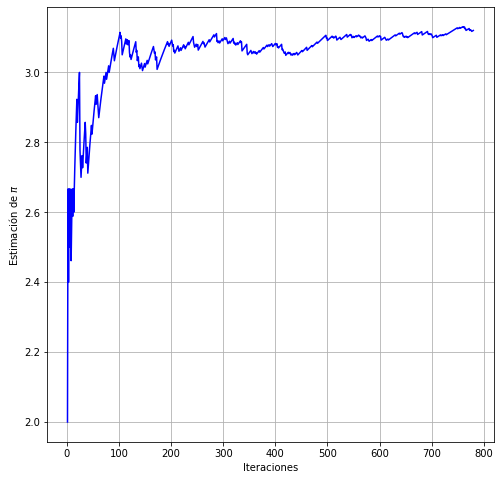

In [ ]:
pi_mc(1000)

Si se tiene, para cada punto aleatorio:
    
$X_i = 1$ si cae dentro del circulo y

$X_i = 0$ si cae fuera

## Ejercicio 4:

a) Calcular $E[X_i]$ y $V[X_i]$




Tenemos que la probabilidad de que caiga dentro del cuarto de circulo, calculada teoricamente es igual al cociente de las areas:

\begin{gather}
         P=\frac{\frac{\pi}{4}}{1}=\frac{\pi}{4}
     \end{gather}

Ahora se persive que estamos trabajando con una probabilidad binomial ya que se cuenta el numero de exitos de n ensayos, considerando exito al suceso de que caiga el punto dentro del circulo. Ademas cada tiro es independiente del otro. 

Entonces como tenemos una distribucion binomial tenemos que la media o valor esperado se calcula como el producto del numero de ensayos por la probabilidad de estos.

\begin{gather}
         E(X_i)=1*P(X_i=1)+0*P(X_i=0)=P(X_i=1)p=\frac{\pi}{4}
     \end{gather}

Para el calula de la media tenemos un procedimiento parecido, solo que esta consigue con el producto de n por la probabilidad de que ocurra el exito (p) por la probabilidade de 1-p. Con el calculo del valor espera se demostro que np=p partiendo de ahi tenemos que:

\begin{gather}
         V(X_i)=pq=p(1-p)=\frac{\pi}{4}(1-\frac{\pi}{4})
     \end{gather}





Para el experimento de simulación, definimos $Z_N =4 \frac{X_1 + X_2 + ... + X_N}{N}$

## Ejercicio 5:
a) Calcular  $E[Z_N]$ y $V[Z_N]$
b) ¿Cuál debe ser el valor de $N$ para que el error sea de 0.01?

Ahora para el valor esperado con $Z_N$. Tenemos:

$E(Z_N)=\frac{4}{N}(E(x_1)+...+E(x_N))=\frac{4}{N}Np=4p=4\frac{\pi}{4}=\pi$

Seguimos con la varianza:

$V(Z_N)=\frac{4^2}{N^2}(V(x_1)+...+V(x_N))=\frac{16}{N}Npq=16\frac{p(1-p)}{N}$

Por ultimo calculamos el valor de N para que el error sea de 0.01:

$16\frac{\frac{\pi}{4}(1-\frac{\pi}{4})}{N}=0.001$

$N=16\frac{\frac{\pi}{4}(1-\frac{\pi}{4})}{0.001}$

$N=2696.76621$

# Integrales

In [ ]:
def riemannplot(f, a, b, ra, rb, n):
    # f es la función 
    # a y b son los limites del eje x para graficar la funcion f
    # ra y rb son los limites del intervalo en el eje x del que queremos calcular la suma
    # n es el numero de rectangulos que calcularemos

    atenuacion = (b-a)/100
    x = np.arange(a, b+atenuacion, atenuacion)
    
    plt.plot(x, f(x), color='red')

    delta_x = (rb-ra)/n
    riemannx = np.arange(ra, rb, delta_x)
    riemanny = f(riemannx)
    riemann_sum = sum(riemanny*delta_x)

    plt.bar(riemannx,riemanny,width=delta_x,alpha=0.5,edgecolor = 'black',facecolor='green')
   
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    plt.title('Suma de Riemann por la izquierda de f(x)')
    plt.figtext(0.1,-0.05, "Suma de Riemann: %.5f " %(riemann_sum), color='b')
    plt.savefig('riemann.png')
    plt.show()

In [ ]:
def f(x):
    return np.sqrt(np.arctan(x))

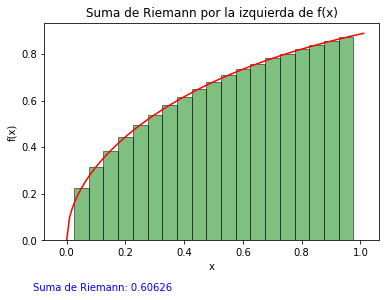

In [ ]:
riemannplot(f, 0, 1.001, 0, 1.001, 20)

In [ ]:
#este programa calcula la integral de la raiz del arctang con el metodo de Monte Carlo 
import math
import numpy 
puntosx=[]
puntosy=[]
adentro=0
z=10000

for i in range(z):
  puntosx.append(random.uniform(0,1))
  puntosy.append(random.uniform(0,1))

for i in range(z):
  if (math.sqrt(numpy.arctan(puntosx[i])))-puntosy[i]>=0:
    adentro=adentro+1

print(adentro/z)


0.6273
